In [1]:
from numpy import*
import matplotlib.pyplot as plt
import matplotlib

In [3]:
def loadDataSet(filename,delim='\t'):#用两个参数，分别是文件路径，进行片段切分的符号
    fr = open(filname)
    stringlist = [line.strip().split(delim) for line in fr.readlines() ]#读取每一行，读取之后剔除每一行的空格，然后切分
    dataMax = [list(map(float,line)) for line in stringlist]#map操作，首先第一参数是方法，转为浮点类型，在接收为列表
    return mat(dataMax)


if __name__ == '__main__':#加载数据集并转化为浮点型的数据
    filname = 'C:\\Users\\23224\\Desktop\\lianxi.txt'
    dataMax = loadDataSet('C:\\Users\\23224\\Desktop\\lianxi.txt')
#     print('坐标系原始数据： \n',dataMax)

###方差：度量一维数据的离散程度，方差越小，数据越稳定
###协方差：度量二维数据，计算各个维度偏离均值的统计量
###协方差矩阵，计算N维数据偏离其均值的程度

###实现PCA算法步骤：去除平均值，将协方差矩阵排序，计算特征值和特征向量，将特征值排序，保留前N个特征向量，N个特征向量构建新空间

In [77]:
def pca(dataMax,topNfeat):#原始数据矩阵与应用的n个特征
    #计算每一列的均值
    meanVals = mean(dataMax,axis=0)#axis=0,表示求列的平均值，axis=1，表示求行的平均值
    #     print('各列的平均值：\n',meanVals
    meanremoved = dataMax-meanVals#每一个数减去均值
    #     print(menaremoved)
    covMat = cov(meanremoved,rowvar=0)#rowvar表示传入的数据是一个样本,一行一行的传入的
    #计算特征值和特征向量
    eigVals,eigVects = linalg.eig(mat(covMat))
#     print('特征值：\n',eigVals,'\n特征向量: \n',eigVects)
    eigValIend = argsort(eigVals)#从小到大排序，返回序号
    #保留前N个特征值对应的特征向量
    eigValIend = eigValIend[:-(topNfeat+1):-1]
#     print(eigValIend)
    redEigVect = eigVects[:,eigValIend]
#     print('保留前N个最大的特征值对应的特征向量：',redEigVect.T)
    #将数据置换到新的空间，完成降维
    lowDataMat = meanremoved*redEigVect#低维度的数据=去除均值的值*处理后的矩阵
    reconMat = (lowDataMat*redEigVect.T)+meanVals#降维后的数据 = 低维度的数据矩阵*特征向量的转置+每行的平均值
    
    return lowDataMat,reconMat
    
if __name__ == '__main__':
    #1.加载数据集
    dataMax = loadDataSet('lianxi.txt')
    print('坐标系原始数据：\n',dataMax)
    lowDataMat,reconMat = pca(dataMax,2)
#     print('降维前的数据规模:\n',lowDataMat)
    
    lowDataMat,reconMat = pca(dataMax,1)
#     print('降维后的数据规模：\n',lowDataMat)
    
#     print(shape(reconMat))
    
   
    print('降维后的数据：\n',reconMat)
    # print('坐标系原始数据： \n', dataMax)
    #2.主成分分析，降维特征向量

坐标系原始数据：
 [[ 2.67  2.68]
 [ 2.67  2.69]
 [ 2.69  2.7 ]
 ...
 [10.41 10.6 ]
 [10.62 10.78]
 [10.49 10.98]]
降维后的数据：
 [[ 2.65858882  2.69115703]
 [ 2.66358755  2.69626963]
 [ 2.67836109  2.71137969]
 ...
 [10.40043241 10.6093545 ]
 [10.59304499 10.80635467]
 [10.62948342 10.84362315]]


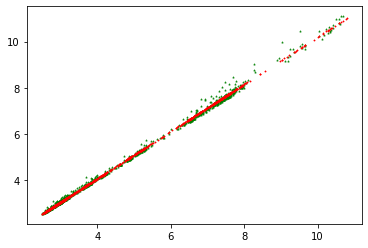

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111)
#flatten方法能将矩阵数据变成一维
ax.scatter(dataMax[:,0].flatten().A[0],dataMax[:,1].flatten().A[0],marker='^',s=1,c='green')
ax.scatter(reconMat[:,0].flatten().A[0],reconMat[:,1].flatten().A[0],marker='*',s=1,c='red')
plt.show()